# **Recommendation System Part - 1 **

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


In [3]:
interaction_df = pd.read_csv('/content/drive/MyDrive/MIT/Capstone/minimal_dataset/10000.txt'
                       ,sep="\t", header=None, names=["user_id", "song_id", "play_count"])
display(interaction_df.head())
song_df = pd.read_csv('/content/drive/MyDrive/MIT/Capstone/minimal_dataset/song_data.csv')

,user_id,song_id,play_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [4]:
display(interaction_df.dtypes)
print("--------------")
display(interaction_df.isna().sum())

user_id       object
song_id       object
play_count     int64
dtype: object

--------------


user_id       0
song_id       0
play_count    0
dtype: int64

In [5]:
display(song_df.dtypes)
print("--------------")
display(song_df.isna().sum())

song_id        object
title          object
release        object
artist_name    object
year            int64
dtype: object

--------------


song_id         0
title          15
release         5
artist_name     0
year            0
dtype: int64

In [6]:
song_df.drop_duplicates(['song_id'], inplace=True)

user_song_df = pd.merge(interaction_df, \
                   song_df.drop_duplicates(['song_id']), \
                   on="song_id", how="left")
print(user_song_df.columns)
display(user_song_df.head(10))

Index(['user_id', 'song_id', 'play_count', 'title', 'release', 'artist_name',
       'year'],
      dtype='object')


,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5,Apuesta Por El Rock 'N' Roll,Antología Audiovisual,Héroes del Silencio,2007
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1,Paper Gangsta,The Fame Monster,Lady GaGa,2008
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1,Stacked Actors,There Is Nothing Left To Lose,Foo Fighters,1999
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1,Sehr kosmisch,Musik von Harmonia,Harmonia,0
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1,Heaven's gonna burn your eyes,Hôtel Costes 7 by Stéphane Pompougnac,Thievery Corporation feat. Emiliana Torrini,2002


In [7]:
from sklearn import preprocessing
le_song_id = preprocessing.LabelEncoder()
le_song_id.fit(user_song_df.song_id)
user_song_df.song_id = le_song_id.transform(user_song_df.song_id)
display(user_song_df.head(10))

print("---------------")

le_user_id = preprocessing.LabelEncoder()
le_user_id.fit(user_song_df.user_id)
user_song_df.user_id = le_user_id.transform(user_song_df.user_id)
display(user_song_df.head(10))

user_song_df.shape

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,736,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1239,5,Apuesta Por El Rock 'N' Roll,Antología Audiovisual,Héroes del Silencio,2007
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1536,1,Paper Gangsta,The Fame Monster,Lady GaGa,2008
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,2056,1,Stacked Actors,There Is Nothing Left To Lose,Foo Fighters,1999
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,2220,1,Sehr kosmisch,Musik von Harmonia,Harmonia,0
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,3046,1,Heaven's gonna burn your eyes,Hôtel Costes 7 by Stéphane Pompougnac,Thievery Corporation feat. Emiliana Torrini,2002


---------------


,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
5,54961,1239,5,Apuesta Por El Rock 'N' Roll,Antología Audiovisual,Héroes del Silencio,2007
6,54961,1536,1,Paper Gangsta,The Fame Monster,Lady GaGa,2008
7,54961,2056,1,Stacked Actors,There Is Nothing Left To Lose,Foo Fighters,1999
8,54961,2220,1,Sehr kosmisch,Musik von Harmonia,Harmonia,0
9,54961,3046,1,Heaven's gonna burn your eyes,Hôtel Costes 7 by Stéphane Pompougnac,Thievery Corporation feat. Emiliana Torrini,2002


(2000000, 7)

In [8]:
users = user_song_df.user_id
ratings_count = dict()

for user in users:
    if user in ratings_count:
        ratings_count[user] += 1
    else:
        ratings_count[user] = 1    

In [9]:
RATINGS_CUTOFF = 90
remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = user_song_df.loc[ ~ user_song_df.user_id.isin(remove_users)]
df.shape

(438390, 7)

In [10]:
songs = df.song_id
ratings_count = dict()

for song in songs:
    if song in ratings_count:
        ratings_count[song] += 1
    else:
        ratings_count[song] = 1    

In [11]:
RATINGS_CUTOFF = 120
remove_songs = []

for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]
print(df_final.shape)

(130398, 7)


In [12]:
print(df_final.shape)
index_to_remove = df_final[df_final['play_count'] > 5].index
df_final.drop(index_to_remove , inplace=True)
print(df_final.shape)


(130398, 7)
(117876, 7)


In [13]:
print('Count of unique users:', len(df_final.user_id.unique()))


Count of unique users: 3155


In [14]:
print('Count of unique songs:', len(df_final.song_id.unique()))


Count of unique songs: 563


In [15]:
top_20_songs = df_final[['title', 'play_count']].groupby('title').sum().sort_values('play_count', ascending=False).head(20)
display(top_20_songs)

,play_count
title,
Dog Days Are Over (Radio Edit),1634
Sehr kosmisch,1583
Use Somebody,1463
Secrets,1427
Fireflies,1291
The Scientist,1259
Hey_ Soul Sister,1208
Clocks,1203
OMG,1126


In [16]:
top_20_users = df_final[['user_id', 'play_count']].groupby('user_id').sum().sort_values('play_count', ascending=False).head(20)
display(top_20_users)

,play_count
user_id,
3237,586
15733,479
62759,438
43041,417
27401,409
66268,403
23337,399
48844,397
19783,396


#### **Observations and Insights:**
1. Looking at the above data we see that the top 20 songs list is headed by "Dog Days Are Over (Radio Edit)" listened 1634 times.
2. Looking at the above data we see that the top 20 user list is headed by "user id - 3237" who has listened songs 586 times.

In [17]:
count_songs = df_final.groupby('year').count()['title']
count = pd.DataFrame(count_songs)
count.drop(count.index[0], inplace = True)
count.tail()

,title
year,
2006,7592
2007,13750
2008,14031
2009,16351
2010,4087


In [18]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


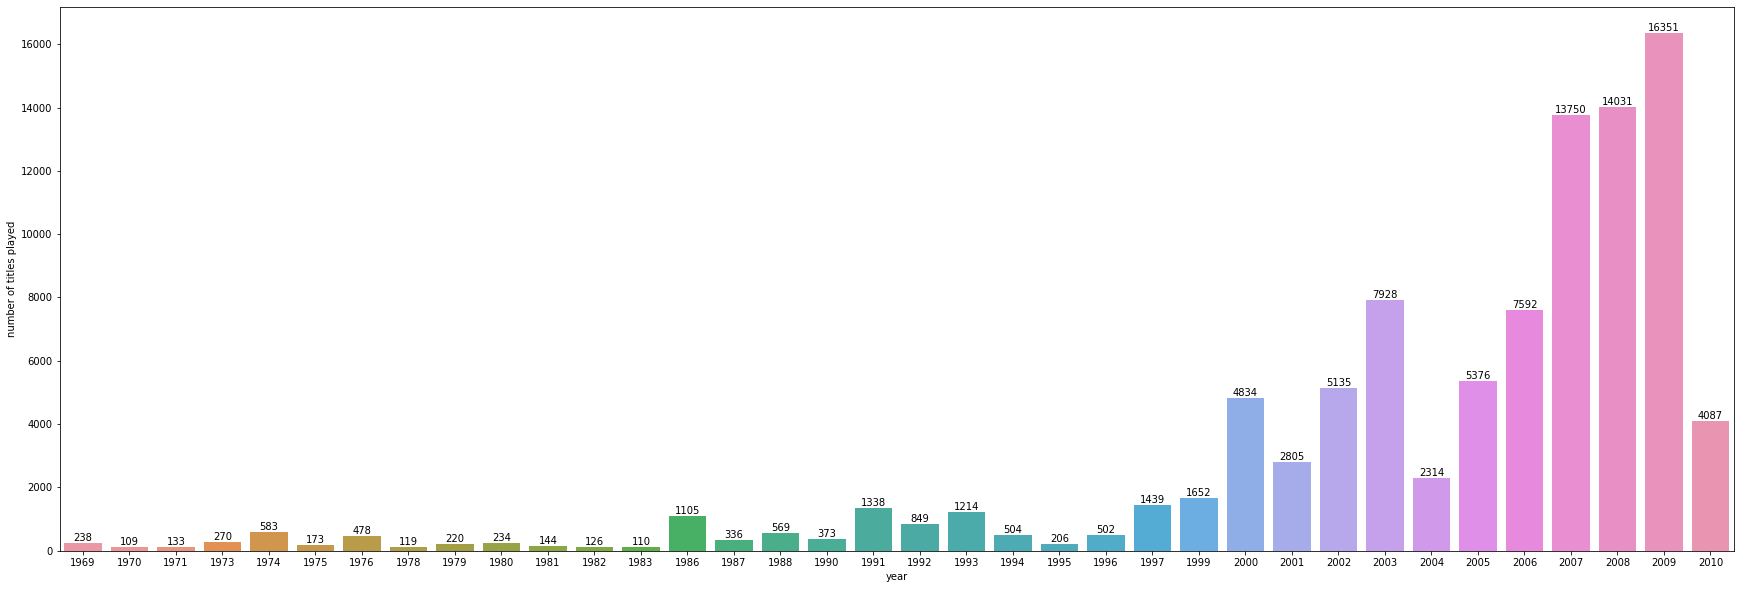

In [19]:
import seaborn as sns

plt.figure(figsize = (30, 10))

res = sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median)

for c in res.containers:
    # set the bar label
    res.bar_label(c, fmt='%.0f', label_type='edge')


# Set the y label of the plot
plt.ylabel('number of titles played') 

# Show the plot
plt.show()

Text(0.5, 0, 'play_count')

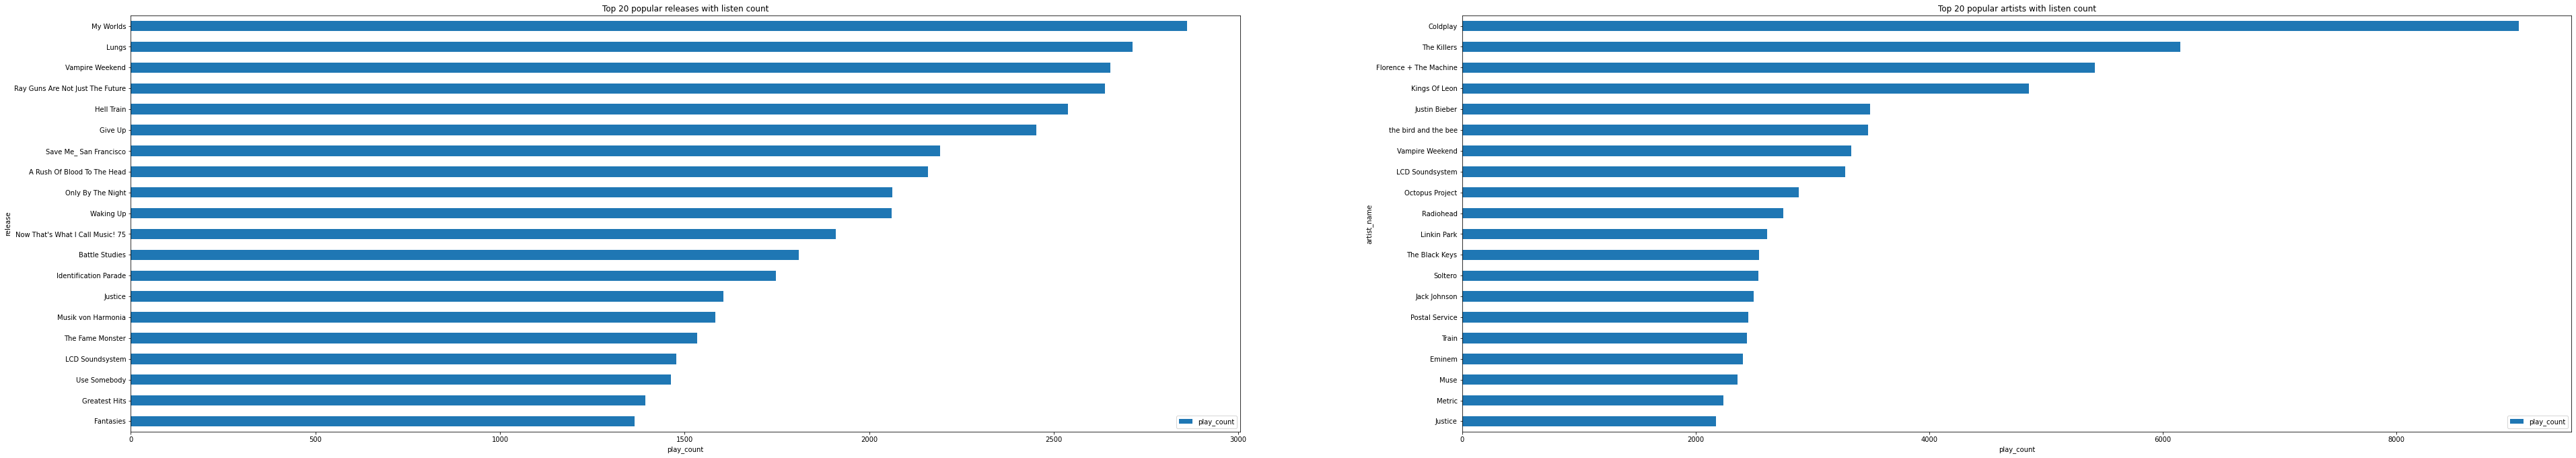

In [20]:
plt.figure(figsize = (65, 25))

# First plot : top 20 popular releases with listen count
ax2 = plt.subplot(2, 2, 1)

top_20_songs = df_final[['release', 'play_count']].groupby('release').sum().sort_values('play_count', ascending=False).head(20).sort_values('play_count')
top_20_songs.plot.barh(title='Top 20 popular releases with listen count', ax=ax2)

plt.ylabel('release')
plt.xlabel('play_count')

# Second plot : top 20 popular artist_name with listen count
ax3 = plt.subplot(2, 2, 2)

top_20_songs = df_final[['artist_name', 'play_count']].groupby('artist_name').sum().sort_values('play_count', ascending=False).head(20).sort_values('play_count')
top_20_songs.plot.barh(title='Top 20 popular artists with listen count', ax=ax3)

plt.ylabel('artist_name')
plt.xlabel('play_count')


In [21]:
from scipy.stats import skew, norm, probplot
# Helps us to visulalize both the distribution and probability plots
def plot(data, measure):
    fig = plt.figure(figsize=(50,25))
    subplot_1 = plt.subplot(2, 2, 1)

    # Fit normal distribution
    mu, std = norm.fit(data)

    # Plot the histogram.
    plt.hist(data, bins=50, density=True, alpha=0.6, color='g')

    # Plot PDF (Probability Denisty Function)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)

    title = measure + ", distribution, mu = %.2f,  std = %.2f" % (mu, std)
    subplot_1.set_title(title, loc='center')
    subplot_1.set_xlabel(measure)
    subplot_1.set_ylabel('Frequency')

    # Probability plot
    subplot_2 = plt.subplot(2, 2, 2)

    res = probplot(data, plot=subplot_2)
    subplot_2.set_title(measure + ' probability plot (skewness: {:.6f} and kurtosis: {:.6f} )'.format(data.skew(), data.kurt()), loc='center')

    plt.tight_layout()
    plt.show()

,user_id,title
2547,61472,243
661,15733,227
1561,37049,202
398,9570,184
964,23337,177


,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
title,3155.0,37.361648,29.743121,1.0,17.0,30.0,47.0,243.0


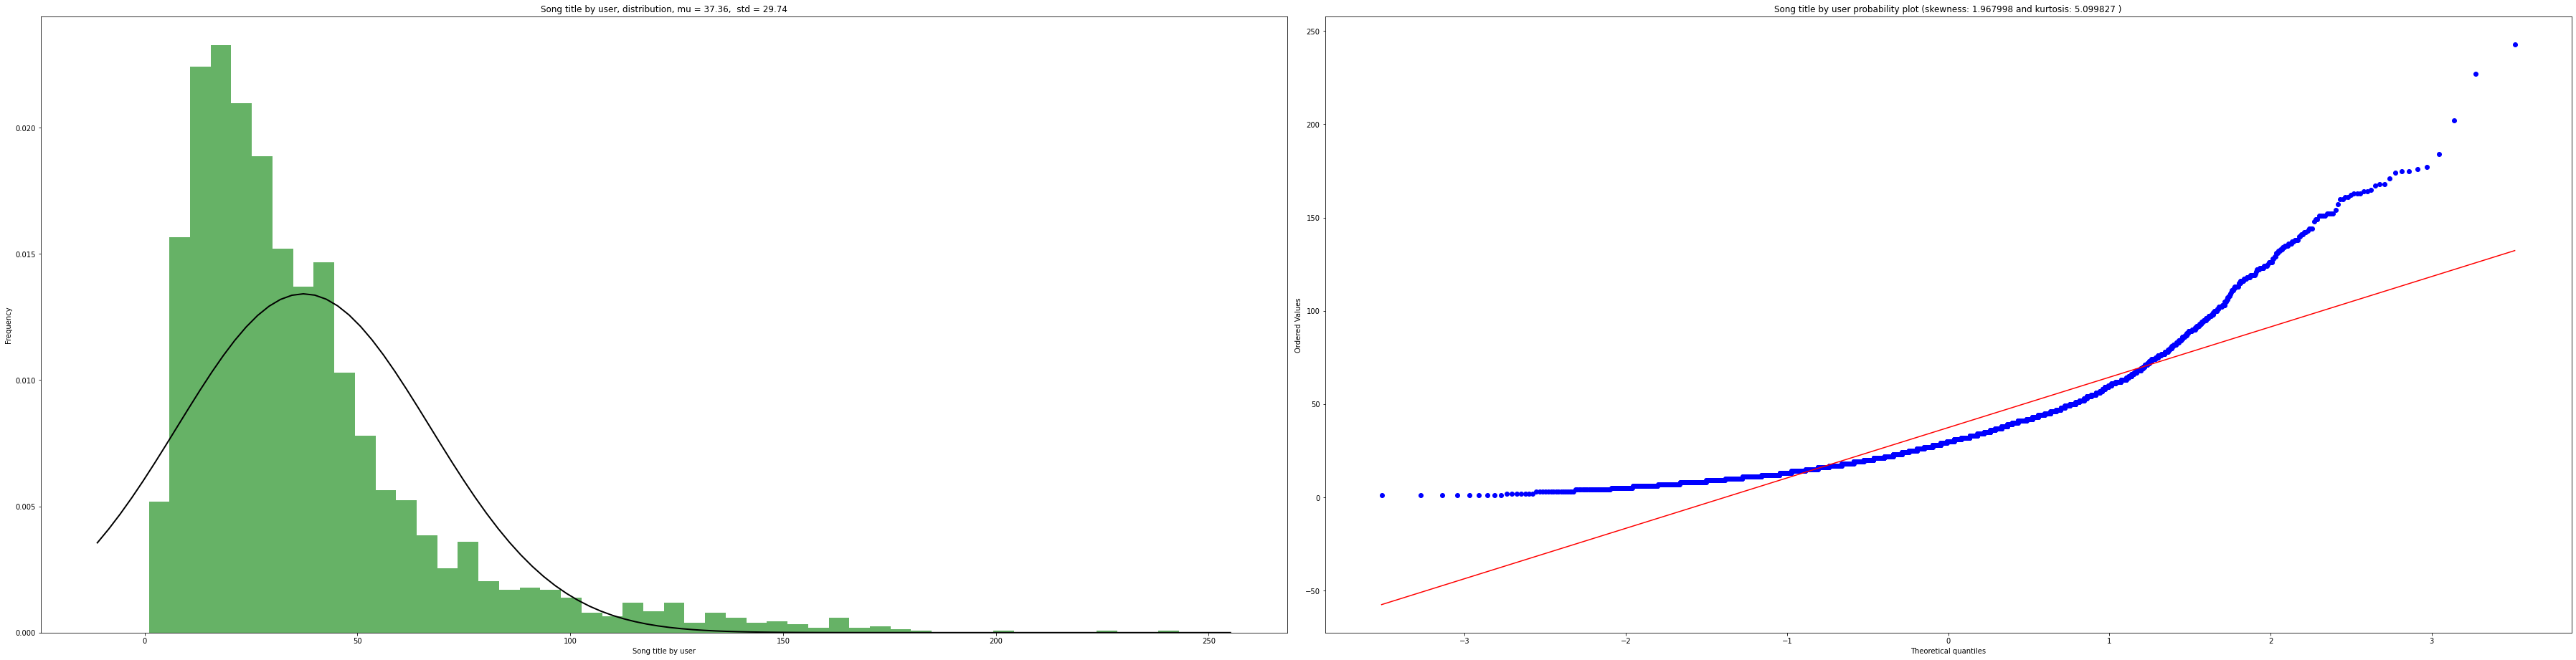

In [26]:
user_title_count_dist = df_final[['user_id','title']].groupby('user_id').count().\
                                reset_index().sort_values(by='title',ascending = False)
display(user_title_count_dist.head())
display(user_title_count_dist.title.describe().reset_index().T)
plot(user_title_count_dist.title, 'Song title by user')


In [27]:
df_final.to_csv("/content/drive/MyDrive/MIT/Capstone/minimal_dataset/final_data.csv", index=False)